In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from datetime import datetime
from sklearn.model_selection import StratifiedKFold

In [3]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#1. Categorical Attributes

#workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#Individual work category
#education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#Individual's highest education degree
#marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
#Individual marital status
#occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#Individual's occupation
#relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#Individual's relation in a family
#race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#Race of Individual
#sex: (categorical) Female, Male.
#native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
#Individual's native country
#2. Continuous Attributes

#age: continuous.
#Age of an individual
#education-num: number of education year, continuous.
#Individual's year of receiving education
#fnlwgt: final weight, continuous.
#The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
#capital-gain: continuous.
#capital-loss: continuous.
#hours-per-week: continuous.
#Individual's working hour per week

In [7]:
data.isnull().sum() #data içerisinde null değerlerin olup olmaması kontrol edildi

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
import math #başka herhangi bir yerde eksik veri var mı kontrol edildi
for col in data.columns:
    print(col)
    column = data[col].tolist()
    column
    index=0;
    for x in column:
        if x is None or x == "?":
            print(col,"kolonu içerisinde",index,". satırda eksik veri var")
            break;
        index=index+1

age
workclass
workclass kolonu içerisinde 4 . satırda eksik veri var
fnlwgt
education
educational-num
marital-status
occupation
occupation kolonu içerisinde 4 . satırda eksik veri var
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
native-country kolonu içerisinde 19 . satırda eksik veri var
income


In [9]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_attrib


In [10]:
import math #datanın temizlenip temizlenmediği kontrol edildi
for col in data.columns:
    print(col)
    column = data[col].tolist()
    column
    index=0;
    for x in column:
        if x is None or x == "?":
            print(col,"kolonu içerisinde",index,". satırda eksik veri var")
            break;
        index=index+1

age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


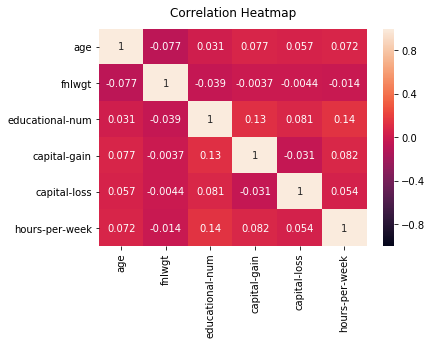

In [11]:
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True) # sayısal sütunlar arası korelasyona bakılıyor yüksek varsa elimine edilecek
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

{'Masters', '12th', '1st-4th', 'Preschool', 'Prof-school', 'Doctorate', '10th', 'Assoc-acdm', 'Bachelors', 'Assoc-voc', '7th-8th', 'HS-grad', 'Some-college', '5th-6th', '11th', '9th'}


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [13]:
#9, 10, 11, 12, lise'ye girer ancak ayrı olarak belirtilmiştir(HS-grad)
#1.-4., 5.-6., 7.-8. 'de ilkokula girer (elementary)

hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

data['education'].value_counts()

HS-grad              20398
Some-college         10878
Bachelors             8025
Masters               2657
Assoc-voc             2061
elementary_school     1711
Assoc-acdm            1601
Prof-school            834
Doctorate              594
Preschool               83
Name: education, dtype: int64

In [14]:
foo=set() #medeni durumu ile alakalı kategorik attributeları ve kaç defa geçtiğini çıkartırdık
for col in data.columns:
    column = data[col].tolist()
    if col=="marital-status":
        for x in column:
            foo.add(x)
print(foo)
data['education'].value_counts()
#---martial-status column---
#Never-married: evlenmemiş
#Married-civ-spouse: bir vatandaşla evli
#Married-AF-spouse: askerle evli
#Married-spouse-absent: evli fakat eşlerden en az biri bir sebepten dolayı evden uzakta yaşamakta
#Divorced:boşanmış
#Separated:boşanmak amacıyla ayrı yaşayan veya ayrılanlar
#Widowed: dul


{'Separated', 'Married-spouse-absent', 'Divorced', 'Married-civ-spouse', 'Never-married', 'Married-AF-spouse', 'Widowed'}


HS-grad              20398
Some-college         10878
Bachelors             8025
Masters               2657
Assoc-voc             2061
elementary_school     1711
Assoc-acdm            1601
Prof-school            834
Doctorate              594
Preschool               83
Name: education, dtype: int64

In [15]:
#Married-civ-spouse,Married-spouse-absent,Married-AF-spouse Evli kategorisine giriyor(married)
#Divorced, separated yine ayrılmış kategorisine giriyor.(seperated)

married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
data['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital-status'].value_counts()

Married          23044
Never-married    16117
Separated         8163
Widowed           1518
Name: marital-status, dtype: int64

In [16]:
foo=set() #iş tanımıyla ile alakalı kategorik attributeları ve kaç defa geçtiğini çıkartırdık
for col in data.columns:
    column = data[col].tolist()
    if col=="workclass":
        for x in column:
            foo.add(x)
print(foo)
data['workclass'].value_counts()
#---workclass column---
#Private: özel bir kuruluş için 
#Self-emp-not-inc:Bağımsız serbest meslek: Diğer tüzel kişiliklerde kendileri için çalışan kişileri ifade eder.
#Local-gov: yerel yönetim
#State-gov: devlet-eyalet yönetimi
#self-emp-inc: Kurumsal kuruluşlarda kendileri için çalışan kişileri ifade eder.
#Federal-gov: federal yönetim
#Without-pay: işsiz
#Never-worked: hiç çalışmamış

{'Federal-gov', 'Private', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay', 'Self-emp-not-inc'}


Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [17]:
#Self-emp-not-inc, Self-emp-inc bunların hepsi serbest meslek olduğundan tekbir başlık altında birleştirilebilir (self employed)
#Local-gov,State-gov,Federal-gov  bunların hepsi devlet adına çalışığından tekbir başlık altında birleştirilebilir(govt_employees)

self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
data['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['workclass'].value_counts()

Private           36705
Govt_employees     6549
Self_employed      5557
Without-pay          21
Never-worked         10
Name: workclass, dtype: int64

In [18]:
data['native-country'].replace(['United-States'], 'N-America', inplace=True)
data['native-country'].replace(['Mexico'], 'N-America', inplace=True)
data['native-country'].replace(['Philippines'], 'Asia', inplace=True)
data['native-country'].replace(['Germany'], 'Europe', inplace=True)
data['native-country'].replace(['Puerto-Rico'], 'N-America', inplace=True)
data['native-country'].replace(['Canada'], 'N-America', inplace=True)
data['native-country'].replace(['India'], 'Asia', inplace=True)
data['native-country'].replace(['El-Salvador'], 'MS-America', inplace=True)
data['native-country'].replace(['Cuba'], 'MS-America', inplace=True)
data['native-country'].replace(['England'], 'Europe', inplace=True)
data['native-country'].replace(['Jamaica'], 'MS-America', inplace=True)
data['native-country'].replace(['Italy'], 'Europe', inplace=True)

data['native-country'].replace(['China'], 'Asia', inplace=True)
data['native-country'].replace(['Dominican-Republic'], 'MS-America', inplace=True)
data['native-country'].replace(['Vietnam'], 'Asia', inplace=True)
data['native-country'].replace(['Guatemala'], 'MS-America', inplace=True)
data['native-country'].replace(['Japan'], 'Asia', inplace=True)
data['native-country'].replace(['Columbia'], 'MS-America', inplace=True)
data['native-country'].replace(['Poland'], 'Europe', inplace=True)
data['native-country'].replace(['Taiwan'], 'Asia', inplace=True)
data['native-country'].replace(['Haiti'], 'MS-America', inplace=True)
data['native-country'].replace(['Iran'], 'Asia', inplace=True)
data['native-country'].replace(['Portugal'], 'Europe', inplace=True)
data['native-country'].replace(['Nicaragua'], 'MS-America', inplace=True)

data['native-country'].replace(['Peru'], 'MS-America', inplace=True)
data['native-country'].replace(['Greece'], 'Europe', inplace=True)
data['native-country'].replace(['Ecuador'], 'MS-America', inplace=True)
data['native-country'].replace(['France'], 'Europe', inplace=True)
data['native-country'].replace(['Ireland'], 'Europe', inplace=True)
data['native-country'].replace(['Hong'], 'Asia', inplace=True)
data['native-country'].replace(['Trinadad&Tobago'], 'MS-America', inplace=True)
data['native-country'].replace(['Cambodia'], 'Asia', inplace=True)
data['native-country'].replace(['Laos'], 'Asia', inplace=True)
data['native-country'].replace(['Thailand'], 'Asia', inplace=True)
data['native-country'].replace(['Yugoslavia'], 'Europe', inplace=True)
data['native-country'].replace(['Outlying-US(Guam-USVI-etc)'], 'N-America', inplace=True)

data['native-country'].replace(['Hungary'], 'Europe', inplace=True)
data['native-country'].replace(['Honduras'], 'MS-America', inplace=True)
data['native-country'].replace(['Scotland'], 'Europe', inplace=True)
data['native-country'].replace(['Holand-Netherlands'], 'Europe', inplace=True)

#Sonuçta oluşan yeni durum
f = data['native-country'].value_counts().reset_index()
f.columns = ['native-country', 'count']
print('\n',f)


   native-country  count
0      N-America  46029
1           Asia    981
2     MS-America    937
3         Europe    780
4          South    115


In [19]:
for col in data.columns: #gelir konusunda sıkıntılı sonuçlar kontrol ediliyor
    column = data[col].tolist()
    if col=="capital-gain":
        for x in column:
            if(x>30000):
                print(x)

99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
41310
99999
99999
34095
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
34095
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
34095
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
41310
99999
99999
99999
34095
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
99999
34095
99999
9999

In [20]:
del_cols = ['relationship','educational-num'] #Education-num. kaç yıl okuduğu ve ilişki bilgisine ihtiyacımız yok
data.drop(labels = del_cols,axis = 1,inplace = True)

#65 yaşındai kişilere de ihtiyacımız yok
print("Number of observation before removing:",data.shape)
index_age = data[data['age'] > 65].index
data.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

#capital gain'i 99999 gibi anlamsız kazanca sahip kişilere ihtiyacımız yok
print("Number of observation before removing:",data.shape) 
index_gain = data[data['capital-gain'] == 99999].index
data.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (48842, 13)
Number of observation after removing: (47039, 13)
Number of observation before removing: (47039, 13)
Number of observation after removing: (46804, 13)


In [21]:
#son durumda elimizde olan feature'ları kategorik olanlar ve numerik olanlar şeklinde
#ayırdık. Çünkü kategorik olanları da işin içine çekmek için nümerik bir hale getirmemiz gerek
numeric_columns = ['age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
               'race', 'gender', 'income','native-country']

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# scaler sayesinde datanın içerisinde nümerik olanları belirli bir biçimde oranlayarak aradaki uçurumu kapattı


In [23]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = numeric_columns 
        return df

In [24]:
# scaler sayesinde datanın içerisinde nümerik olanları belirli bir biçimde oranlayarak aradaki uçurumu kapattı
pipeline = Pipeline([('selector',DataFrameSelector(numeric_columns)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [25]:
numerical_dataframe = pipeline.fit_transform(data)
numerical_dataframe.shape
numerical_dataframe

,age,capital-gain,capital-loss,hours-per-week,fnlwgt
0,0.166667,0.000000,0.0,0.397959,0.145129
1,0.437500,0.000000,0.0,0.500000,0.052451
2,0.229167,0.000000,0.0,0.397959,0.219649
3,0.562500,0.186105,0.0,0.397959,0.100153
4,0.020833,0.000000,0.0,0.295918,0.061708
...,...,...,...,...,...
46799,0.208333,0.000000,0.0,0.377551,0.165763
46800,0.479167,0.000000,0.0,0.397959,0.096129
46801,0.854167,0.000000,0.0,0.397959,0.094462
46802,0.104167,0.000000,0.0,0.193878,0.128004


In [54]:
#dummy dataları oluşturduktan sonra geliri 50kdan büyük olanlara ihtiyacımız olmayacak çünkü bir tanesini bilirsek 0/1 değerlerini
#vereceğimizden diğerini de otomatik olarak bilmiş olacağız
cols = ['income_>50K']

In [55]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#fark, orijinal sütunları döndürür, sütunlar bağımsız değişken olarak kaldırılır.
        return df_new

#kategorik feature'ların attribute'larının nümerik olmamasından dolayı bunları nümerik şekle getirdik. 
#bunu da her bir attribute için kolon oluşturup her bir kişi için bu attribute varsa 1 yoksa 0 değeri verdik
pipeline_categories=Pipeline([('selector',DataFrameSelector(categorical_columns)),
                      ('dummies',dummies(cols))])
categorical_dataframe = pipeline_categories.fit_transform(data)
categorical_dataframe

,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,education_elementary_school,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Govt_employees,workclass_Never-worked,workclass_Private,workclass_Self_employed,workclass_Without-pay
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
48838,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
48839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
48840,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [28]:
#kategorik ve numerik data frameler için birer id kolonu oluşturuldu
#çünkü elimizdeki bu iki dataframe'i tek bir bütün haline getirmemiz gerekiyor
categorical_dataframe['id'] = pd.Series(range(categorical_dataframe.shape[0]))
numerical_dataframe['id'] = pd.Series(range(numerical_dataframe.shape[0]))


In [29]:
#bu id kolonuna bağlı olarak iki dataframe bir bütün haline join edildi
final_df = pd.merge(categorical_dataframe,numerical_dataframe,how = 'inner', on = 'id')
print(f"Son durumda datesetin boyutu: {final_df.shape}")

Son durumda datesetin boyutu: (44835, 52)


In [30]:
#income'ı 50k dan düşük olup olmadığı bilgisini içeren kolon listesi alınır, bu ileride bize lazım olacak
y = final_df['income_<=50K'] 

final_df.drop(labels = ['id','income_<=50K','fnlwgt'],axis = 1,inplace = True)
#final durumunda çıkarılması gerekenler çıkartıldıktan sonra geriye kalan data frame
X = final_df 
print(y.shape)
print(X.shape)

(44835,)
(44835, 49)


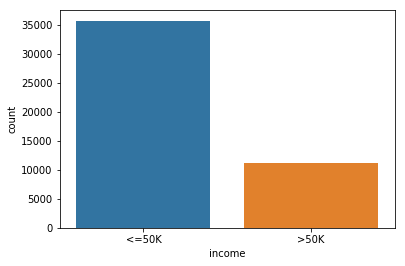

<=50K    35709
>50K     11095
Name: income, dtype: int64

In [31]:
 #orijinal datada bulunan 50k yıllık gelire göre dağılım
#bakıldığı üzere data dengeli bir dağılıma sahip değil bunun öncelikle dengelenmesi gerekir yoksa sonuçlarda
#bir yöne bir eğilim olur
sns.countplot(x="income", data= data)
plt.show()
data["income"].value_counts()

In [32]:
#gereklilikler imbalanced-learn-0.7.0 scikit-learn-0.24.2 imbalanced-learn->imblearn) (2.1.0)
from imblearn.under_sampling import RandomUnderSampler  
# burada under sampling kullandık çünkü zaten elimizde çok veri var yani sonuç olarak çok olan veriyi azaltabiliriz
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y) #bu sayede 50kdan düşük olan veriler azaltılarak, 50k dan fazla olan veriler ile arasındaki uçurum kapatıldı
#X kategori ve nümerik dataların join edilmiş son hali
#y de 50k dan küçük income'a sahip olup olmama verisini içeren kolon
#X_rus sonuçta elde edilen azaltılmış sample,
#y_rus ise tüm income değerleri.
#böylece 50k dan küçükler büyük olanla karşılaştırılarak azaltılmış old


In [33]:
X_rus = pd.DataFrame(X_rus)
X_rus.columns = ['education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters','education_Some-college',
       'education_Preschool', 'education_Prof-school',
       'education_elementary_school', 'gender_Female','gender_Male',
       'marital-status_Married','marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical','occupation_Other-service',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo',  'race_Black','race_Asian-Pac-Islander', 'race_Other',
       'race_White', 'workclass_Never-worked',
       'workclass_Private','workclass_Govt_employess', 'workclass_Self_employed', 'workclass_Without-pay',
       'age', 'capital-gain', 'capital-loss', 'hours-per-week','native_country_N-America','native_country_Asia','native_country_MS_America','native_country_Europe','native_country_South']
y_rus = pd.DataFrame(y_rus)
y_rus.columns = ["income"]

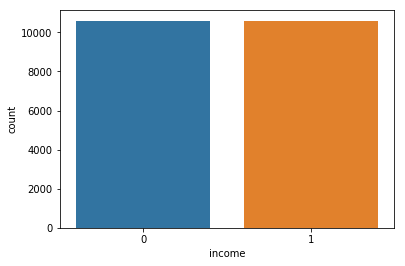

In [34]:
sns.countplot(x="income", data= y_rus)
plt.show()

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus,test_size =0.2,random_state = 42)

In [36]:
X_train.shape

(16948, 49)

In [37]:
from sklearn.model_selection import GridSearchCV
#parameter tuning ile en uygun parametreleri seçmeye çalışacağız logistic regression için
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.001,0.01,0.1,1],
    'penalty': ['l1', 'l2'],
    }
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'C': 1, 'penalty': 'l2'}

In [38]:
#elde edilen parametrelere göre modeli fit ediyoruz
lr1=LogisticRegression(C=1, penalty='l2')
lr1.fit(X_train,y_train)


LogisticRegression(C=1)

In [39]:
# X_test e bağlı olarak tahminimizi gerçekleştiriyoruz 
y_pred1=lr1.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))
print("F1 score:",metrics.f1_score(y_test, y_pred1))

Accuracy: 0.7977819726285984
Precision: 0.8220858895705522
Recall: 0.759565422768068
F1 score: 0.7895899828136509


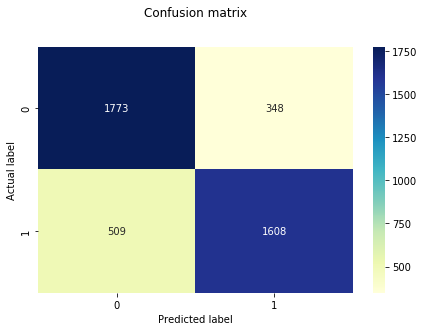

In [41]:
cf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
#eğer ki resampling yapılmazsa ne olur?
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

In [50]:
from sklearn.model_selection import GridSearchCV
#parameter tuning ile en uygun parametreleri seçmeye çalışacağız logistic regression için
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.001,0.01,0.1,1],
    'penalty': ['l1', 'l2'],
    }
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
print(CV_rfc.score(X_train,y_train))

0.7682614029218244


In [51]:
#elde edilen parametrelere göre modeli fit ediyoruz
lr2=LogisticRegression(C=1, penalty='l2')
lr2.fit(X_train,y_train)


LogisticRegression(C=1)

In [52]:
# X_test e bağlı olarak tahminimizi gerçekleştiriyoruz 
y_pred2=lr2.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))
print("F1 score:",metrics.f1_score(y_test, y_pred2))

Accuracy: 0.8235753317720531
Precision: 0.8577037638776063
Recall: 0.922662394407224
F1 score: 0.8889980353634578


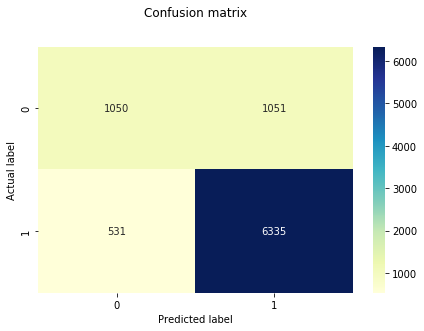

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
#kaynakça
#https://archive.ics.uci.edu/ml/datasets/adult
#https://www.kaggle.com/josefhampp/adult-income-classification
#https://cran.r-project.org/web/packages/fastDummies/vignettes/making-dummy-variables.html
#https://www.kaggle.com/markus22/adult-income-exploring-classifiers-gb-wins-0-87#Inspect-and-Plot-our-Data.
#https://www.kaggle.com/jieyima/income-classification-model
#https://www.kaggle.com/egesoyarar/adult-income-dataset-with-knn
#https://stackoverflow.com/questions/50456812/python-what-is-the-best-way-to-iterate-through-a-dataset-to-pass-the-values-int
#https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-values
#https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
#https://stackoverflow.com/questions/4045403/how-do-i-add-the-contents-of-an-iterable-to-a-set
#https://pypi.org/project/imbalanced-learn/#history
#https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data
#https://www.kaggle.com/alokevil/detailed-explanation-of-all-classification-methods
